In [45]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [46]:
df = pd.read_csv('flats_india_rent.csv', on_bad_lines='skip', sep=',')

df.head(10)

,,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent
2 BHK Flat for Rent in Oberoi Woods,Goregaon East,Mumbai,Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.000000,120000.0
1 BHK Flat for Rent in Sapphire Lakeside,Powai,Mumbai,Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.000000,40000.0
1 BHK House for Rent in Mundhwa Pune,Mundhwa,Pune,550.0,1,1.0,0,Unfurnished,22.0,12000.0,NaN,NaN
2 BHK Flat for Rent in Hingna,Nagpur,Hingna,Nagpur,1000.0,2.0,2,0,Unfurnished,8.0,8000.000000,NaN
1 BHK Flat for Rent in Unique Star Harsh Vihar,Mira Road Area,Mumbai,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.000000,15000.0
1 BHK House for Rent in Jakkur Bangalore,Jakkur,Bangalore,600.0,1,1.0,0,Unfurnished,27.0,16000.0,NaN,NaN
3 BHK Flat for Rent in Chittaranjan Park,New Delhi,Chittaranjan Park,New Delhi,1260.0,3.0,3,2,Unfurnished,47.66666666666666,60000.000000,NaN
3 BHK Flat for Rent in Soami Nagar South,Soami Nagar,New Delhi,Soami Nagar South,New Delhi,2700.0,3,3,2,Semi-Furnished,74.111111,200000.0
1 BHK House for Rent in Hadapsar Pune,Hadapsar,Pune,650.0,1,1.0,0,Unfurnished,17.0,11000.0,NaN,NaN
1 BHK Flat for Rent in Riverdale Suites,Kharadi,Pune,Kharadi,Pune,495.0,1,1,0,Unfurnished,48.000000,24000.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7475 entries, ('2 BHK Flat for Rent in Oberoi Woods', ' Goregaon East') to ('2 BHK Flat for Rent in Govindpura', ' Dooravani Nagar')
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   house_type  7475 non-null   object 
 1   locality    7475 non-null   object 
 2   city        7475 non-null   object 
 3   area        7475 non-null   float64
 4   beds        7475 non-null   int64  
 5   bathrooms   7475 non-null   object 
 6   balconies   7475 non-null   object 
 7   furnishing  7475 non-null   object 
 8   area_rate   5923 non-null   float64
 9   rent        2678 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 859.9+ KB


house_type object
locality object
city object
area float64
beds int64
bathrooms object
balconies object
furnishing object
area_rate float64
rent float64

house_type object
locality object
city object
area float64
beds int64
bathrooms object
balconies object
furnishing object
area_rate float64
rent float64

In [48]:
df.describe()

,area,beds,area_rate,rent
count,7475.000000,7475.000000,5.923000e+03,2.678000e+03
mean,390.683478,1.832910,2.693007e+04,7.109366e+04
std,682.865337,1.205992,5.829064e+04,1.223333e+05
min,0.000000,0.000000,2.000000e+00,3.500000e+03
25%,2.000000,1.000000,4.500000e+01,2.300000e+04
50%,3.000000,2.000000,9.500000e+03,3.850000e+04
75%,737.500000,3.000000,3.000000e+04,7.500000e+04
max,13500.000000,10.000000,1.450000e+06,2.700000e+06


In [49]:
df[df['city'].isin(['Mumbai', 'New Delhi', 'Pune', 'Nagpur', 'Bangalore'])] # отбираем только строки, а не числа

,,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent
2 BHK Flat for Rent in Oberoi Woods,Goregaon East,Mumbai,Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.000000,120000.0
1 BHK Flat for Rent in Sapphire Lakeside,Powai,Mumbai,Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.000000,40000.0
1 BHK Flat for Rent in Unique Star Harsh Vihar,Mira Road Area,Mumbai,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.000000,15000.0
3 BHK Flat for Rent in Soami Nagar South,Soami Nagar,New Delhi,Soami Nagar South,New Delhi,2700.0,3,3,2,Semi-Furnished,74.111111,200000.0
1 BHK Flat for Rent in Riverdale Suites,Kharadi,Pune,Kharadi,Pune,495.0,1,1,0,Unfurnished,48.000000,24000.0
...,...,...,...,...,...,...,...,...,...,...,...
4 BHK Flat for Rent in Oberoi Eternia And Enigma,Mulund West,Mumbai,Mulund West,Mumbai,1926.0,4,3,0,Semi-Furnished,75.000000,150000.0
1 BHK Flat for Rent in Link View,IC Colony,Mumbai,IC Colony,Mumbai,430.0,1,1,0,Semi-Furnished,70.000000,30000.0
2 BHK Flat for Rent in Lodha Fiorenza,Goregaon East,Mumbai,Goregaon East,Mumbai,870.0,2,2,2,Furnished,144.000000,130000.0
2 BHK Flat for Rent in Malpani Vivanta,Balewadi,Pune,Balewadi,Pune,734.0,2,2,2,Unfurnished,48.000000,35000.0


In [50]:
df = df.dropna()

In [51]:
list(df.city.unique())

['Mumbai', 'New Delhi', 'Pune', 'Nagpur', 'Bangalore']

In [52]:
df = df[df['area'] > 225] # не учитываем жилье меньше 225 футов в квадрате оно не пригодное для жизни 

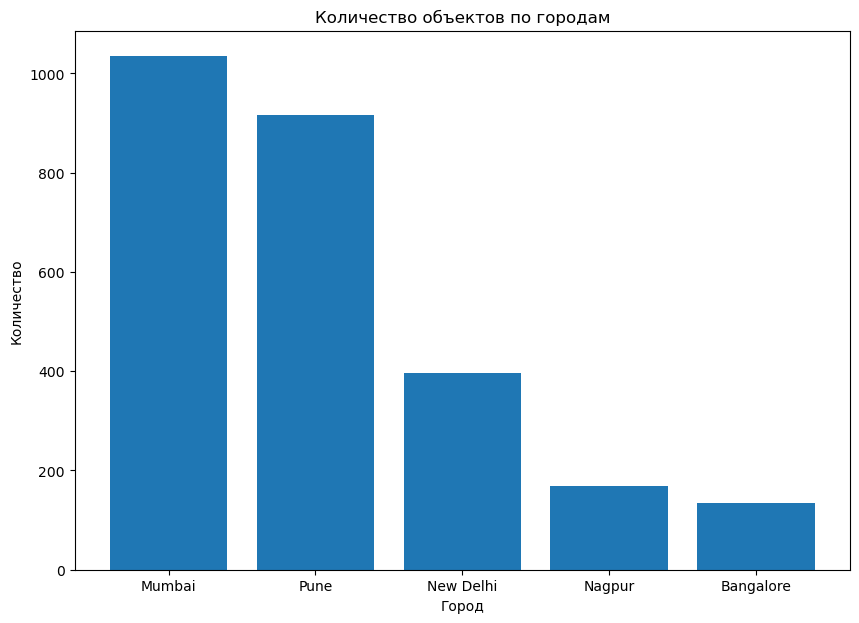

In [54]:
cities_to_show = ['Mumbai', 'New Delhi', 'Pune', 'Nagpur', 'Bangalore']
filtered_df = df[df['city'].isin(cities_to_show)]

plt.figure(figsize=(10, 7))

city_counts = filtered_df['city'].value_counts()

plt.bar(city_counts.index, city_counts.values)
plt.title('Количество объектов по городам')
plt.xlabel('Город')
plt.ylabel('Количество')

plt.show()

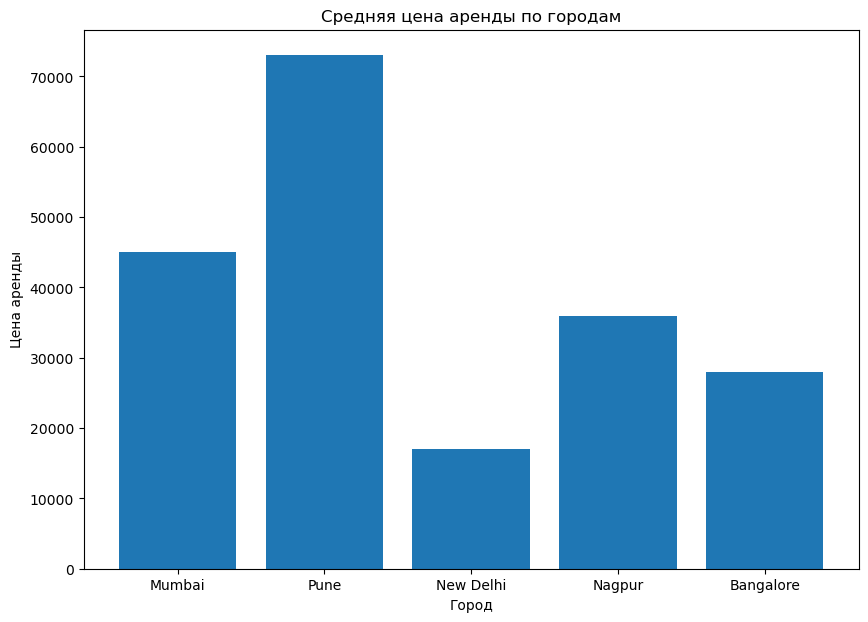

In [55]:
plt.figure(figsize=(10, 7))

city_counts = filtered_df['city'].value_counts()

median_rent_by_city = filtered_df.groupby('city')['rent'].median()

plt.bar(city_counts.index, median_rent_by_city)
plt.title('Средняя цена аренды по городам')
plt.xlabel('Город')
plt.ylabel('Цена аренды')

plt.show()

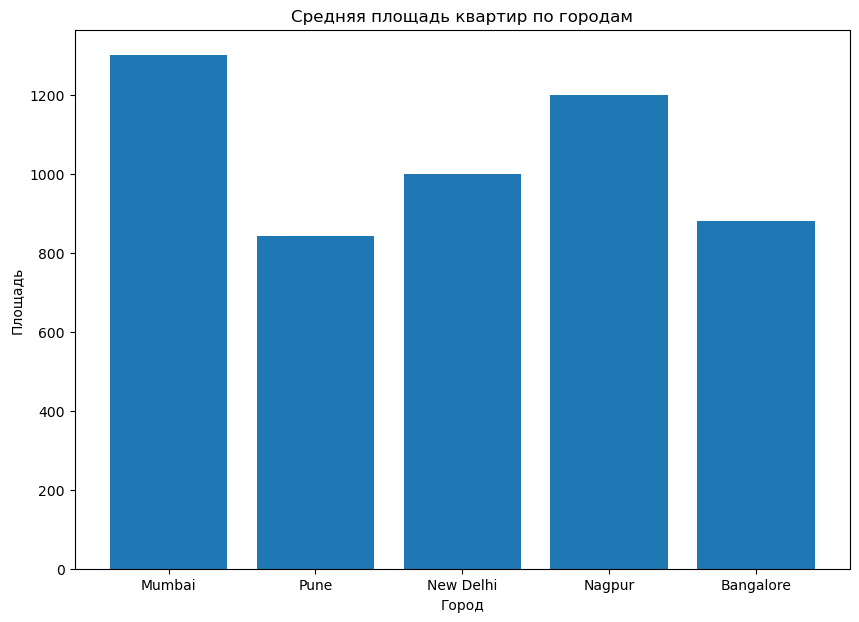

In [80]:
plt.figure(figsize=(10, 7))

city_counts = filtered_df['city'].value_counts()

median_rent_by_city = filtered_df.groupby('city')['area'].median()

plt.bar(city_counts.index, median_rent_by_city)
plt.title('Средняя площадь квартир по городам')
plt.xlabel('Город')
plt.ylabel('Площадь')

plt.show()

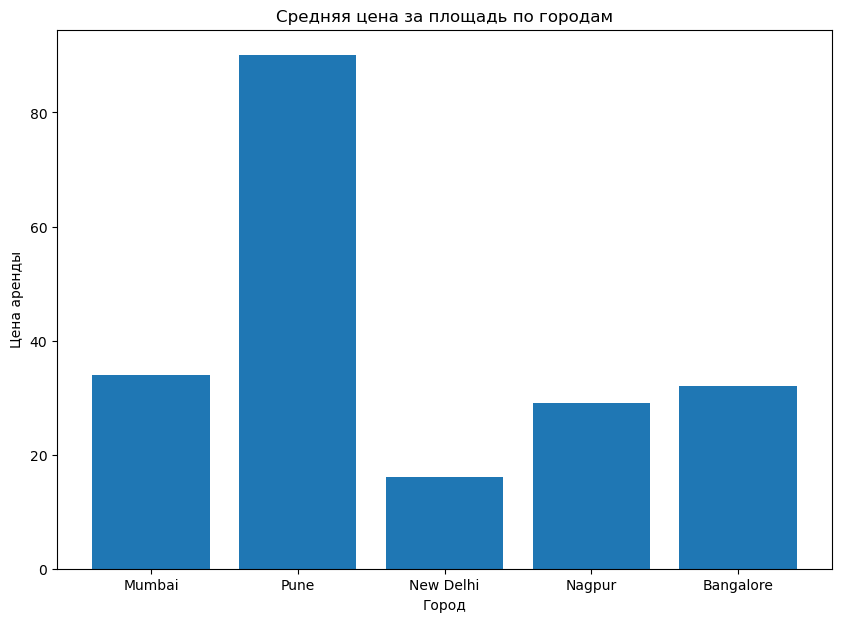

In [57]:
plt.figure(figsize=(10, 7))

city_counts = filtered_df['city'].value_counts()

median_rent_by_city = filtered_df.groupby('city')['area_rate'].median()

plt.bar(city_counts.index, median_rent_by_city)
plt.title('Средняя цена за площадь по городам')
plt.xlabel('Город')
plt.ylabel('Цена аренды')

plt.show()

In [58]:
def redact_value(value): # Заменяем int на "unknown"
    try: 
        num = float(value) 
        return 'Unknown'
    except: 
        return value

def redact_balconies_bathroms_furnishing(value): # создаем категориальные признаки
    try: 
        num = int(value)
        return value
    except:
        if value == 'Furnished':
            return 1
        elif value == 'Semi-Furnished':
            return 0.8
        elif value == 'Unfurnished':
            return 0.5
        
median_rent = df['rent'].median()
median_area_rate = df['area_rate'].median()

def redact_city(city):
    try: 
        num = float(city) 
        return 'Unknown'
    except:
        if city == 'Mumbai':
            return 0
        elif city == 'New Delhi':
            return 1
        elif city == 'Pune':
            return 2
        elif city == 'Nagpur':
            return 3
        elif city == 'Bangalore':
            return 4
        else: 
            return 5

print(median_rent)
print(median_area_rate)

def redact_balconies(value): 
    try: 
        num = int(value)
        return value
    except:
        return 0
        
df.area_rate = df.area_rate.fillna(median_area_rate)
df.rent = df.rent.fillna(median_rent)
df.locality = df.locality.apply(redact_value)
df.city = df.city.apply(redact_city)
df.balconies = df.balconies.apply(redact_balconies_bathroms_furnishing)
df.bathrooms = df.bathrooms.apply(redact_balconies_bathroms_furnishing)
df.furnishing = df.furnishing.apply(redact_balconies_bathroms_furnishing)

40000.0
40.0


In [59]:
list(df.city.unique())


[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]

In [60]:
df

,,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent
2 BHK Flat for Rent in Oberoi Woods,Goregaon East,Mumbai,Goregaon East,0,897.0,2,2,0,0.8,134.000000,120000.0
1 BHK Flat for Rent in Sapphire Lakeside,Powai,Mumbai,Powai,0,490.0,1,1,0,0.8,82.000000,40000.0
1 BHK Flat for Rent in Unique Star Harsh Vihar,Mira Road Area,Mumbai,Mira Road,0,595.0,1,1,0,0.5,25.000000,15000.0
3 BHK Flat for Rent in Soami Nagar South,Soami Nagar,New Delhi,Soami Nagar South,1,2700.0,3,3,2,0.8,74.111111,200000.0
1 BHK Flat for Rent in Riverdale Suites,Kharadi,Pune,Kharadi,2,495.0,1,1,0,0.5,48.000000,24000.0
...,...,...,...,...,...,...,...,...,...,...,...
4 BHK Flat for Rent in Oberoi Eternia And Enigma,Mulund West,Mumbai,Mulund West,0,1926.0,4,3,0,0.8,75.000000,150000.0
1 BHK Flat for Rent in Link View,IC Colony,Mumbai,IC Colony,0,430.0,1,1,0,0.8,70.000000,30000.0
2 BHK Flat for Rent in Lodha Fiorenza,Goregaon East,Mumbai,Goregaon East,0,870.0,2,2,2,1.0,144.000000,130000.0
2 BHK Flat for Rent in Malpani Vivanta,Balewadi,Pune,Balewadi,2,734.0,2,2,2,0.5,48.000000,35000.0


In [61]:
df[['house_type', 'locality', 'city']]

,,house_type,locality,city
2 BHK Flat for Rent in Oberoi Woods,Goregaon East,Mumbai,Goregaon East,0
1 BHK Flat for Rent in Sapphire Lakeside,Powai,Mumbai,Powai,0
1 BHK Flat for Rent in Unique Star Harsh Vihar,Mira Road Area,Mumbai,Mira Road,0
3 BHK Flat for Rent in Soami Nagar South,Soami Nagar,New Delhi,Soami Nagar South,1
1 BHK Flat for Rent in Riverdale Suites,Kharadi,Pune,Kharadi,2
...,...,...,...,...
4 BHK Flat for Rent in Oberoi Eternia And Enigma,Mulund West,Mumbai,Mulund West,0
1 BHK Flat for Rent in Link View,IC Colony,Mumbai,IC Colony,0
2 BHK Flat for Rent in Lodha Fiorenza,Goregaon East,Mumbai,Goregaon East,0
2 BHK Flat for Rent in Malpani Vivanta,Balewadi,Pune,Balewadi,2


In [62]:
df_clean = df.replace('Unknown', pd.NA).dropna() # не null 

In [63]:
df_clean = df_clean[['city', 'area', 'beds', 'bathrooms', 'balconies', 'furnishing', 'area_rate', 'rent']]

<Axes: >

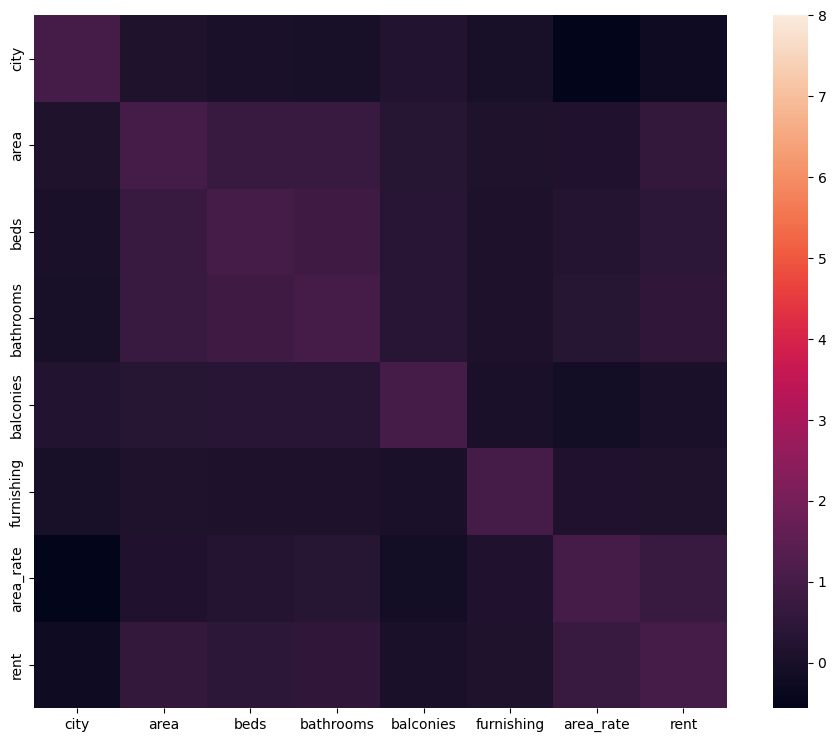

In [64]:
corrmat = df_clean.corr() # Матрица карреляции 
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=8, square=True)

## Исходя из матрицы можно сделать вывод: 

1. Цена заквадратный метр карелирует с площадью
2. Аренда карелирует с площадью
3. Площадь карелирует с количеством спален
4. Количество кроватей кареллирует с количеством ванн 

In [ ]:
plt.scatter(df_clean['area'], df_clean['area_rate']) # распределение цены за площадь
plt.xlabel('Площадь')
plt.ylabel('Цена')

Здесь мы видим, что чем больше площадь квартиры, тем больше цена 

In [69]:
# упрощаем значения
df_clean['rent'] = np.log(df_clean['rent']) 
df_clean['area'] = np.log(df_clean['area']) 

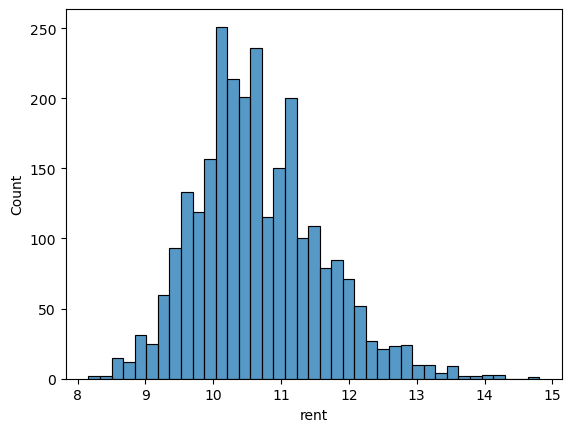

<Figure size 640x480 with 0 Axes>

In [70]:
sns.histplot(df_clean['rent']) # распределение арендной платы
fig = plt.figure()


Здесь мы видим, что большинство квартир имеют среднюю или около нее арендную оплату

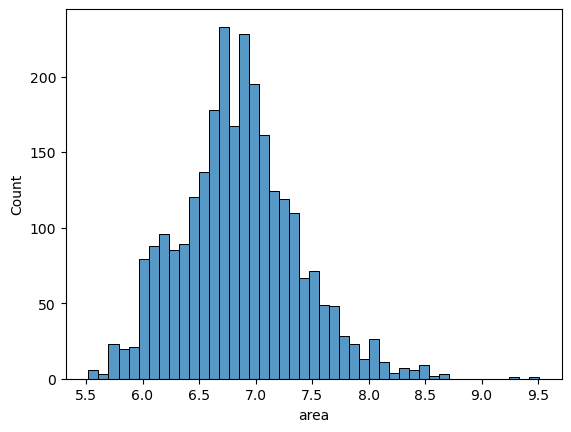

<Figure size 640x480 with 0 Axes>

In [71]:
sns.histplot(df_clean['area']) # распределение площади 
fig = plt.figure()


Также,большинство квартир имеет среднюю площадь, но также наблюдаются отклонения

In [456]:
df.describe()

,city,area,beds,furnishing,area_rate,rent
count,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2.651000e+03
mean,1.235760,1096.566956,2.322143,0.742324,59.303408,7.153105e+04
std,1.180606,736.584310,0.932210,0.193334,50.018361,1.227942e+05
min,0.000000,250.000000,1.000000,0.500000,6.000000,3.500000e+03
25%,0.000000,684.500000,2.000000,0.500000,27.000000,2.300000e+04
50%,1.000000,925.000000,2.000000,0.800000,40.000000,4.000000e+04
75%,2.000000,1273.000000,3.000000,0.800000,78.500000,7.500000e+04
max,4.000000,13500.000000,10.000000,1.000000,441.000000,2.700000e+06


## Статистический вывод. В приведенных в датасете городах (Mumbai, Pune, New Delhi, Nagpur, Bangalore), мы заметили некоторые закономерности и сейчас мы уже можем описать наши города: 

1) В Mumbai больше всего квартир за этим городом уже следуют по порядку Pune, New Dephi, Nagpur, Bangalore.
2) В Pune самая дорогая медианная цена квартир за ним уже следуют по порядку Mumbai, Nagpur, Bangalore, New Delhi.
3) Цена за квадратный метр недвижимости зависит от ее площади.
4) Чем больше площадь недвижимости, тем больше ее аренда.
5) Чем больше площадь недвежимости, тем больше спален в этой недвижимости.
6) Чем больше ванн в квартире, тем больше кроватей.
7) Большинство квартир в трех городах имеют арендную плату и площадь квартиры (моду) достаточно сильно приблеженную к медиане. 